In [2]:
import pandas as pd


In [3]:
df = pd.read_excel('TATA SHARE NEW.xlsx')
df.head()


,Date,Price,Open,High,Low,Volume,Change(%)
0,2003-06-11,8.50,8.53,8.60,8.38,4152979,0.0024
1,2003-06-12,8.42,8.48,8.52,8.40,2636734,-0.0094
2,2003-06-13,8.43,8.47,8.51,8.39,2458084,0.0012
3,2003-06-16,8.31,8.43,8.44,8.28,2148323,-0.0142
4,2003-06-17,8.46,8.40,8.50,8.34,2850715,0.0181


In [4]:
df.tail()

,Date,Price,Open,High,Low,Volume,Change(%)
4965,2023-06-02,108.00,106.50,108.30,106.50,46686933,0.0193
4966,2023-06-05,109.40,108.65,109.90,107.80,39642539,0.0130
4967,2023-06-06,109.00,109.75,109.85,108.30,26751372,-0.0037
4968,2023-06-07,111.50,109.50,111.75,108.90,45157197,0.0229
4969,2023-06-08,111.15,111.50,113.00,110.95,46380294,-0.0031


In [5]:
df1=df.reset_index()['Price']


In [6]:
df1


0         8.50
1         8.42
2         8.43
3         8.31
4         8.46
         ...  
4965    108.00
4966    109.40
4967    109.00
4968    111.50
4969    111.15
Name: Price, Length: 4970, dtype: float64

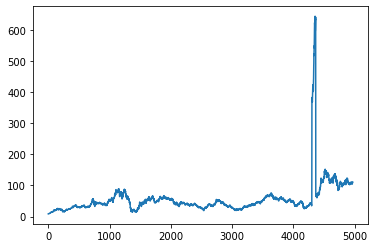

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)


[[0.00029917]
 [0.0001732 ]
 [0.00018895]
 ...
 [0.15854446]
 [0.16248091]
 [0.16192981]]


In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size


(3230, 1740)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)


(3129, 100)
(3129,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)


(1639, 100)
(1639,)


(None, None)

In [17]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)


Epoch 1/10
49/49 [==============================] - 47s 601ms/step - loss: 3.1853e-04 - val_loss: 0.0058
Epoch 2/10
49/49 [==============================] - 22s 443ms/step - loss: 3.5211e-05 - val_loss: 0.0049
Epoch 3/10
49/49 [==============================] - 20s 416ms/step - loss: 2.9141e-05 - val_loss: 0.0044
Epoch 4/10
49/49 [==============================] - 20s 415ms/step - loss: 2.6351e-05 - val_loss: 0.0040
Epoch 5/10
49/49 [==============================] - 21s 429ms/step - loss: 2.4440e-05 - val_loss: 0.0037
Epoch 6/10
49/49 [==============================] - 20s 419ms/step - loss: 2.0810e-05 - val_loss: 0.0035
Epoch 7/10
49/49 [==============================] - 20s 404ms/step - loss: 2.0361e-05 - val_loss: 0.0033
Epoch 8/10
49/49 [==============================] - 18s 378ms/step - loss: 1.8454e-05 - val_loss: 0.0031
Epoch 9/10
49/49 [==============================] - 19s 393ms/step - loss: 1.7151e-05 - val_loss: 0.0030
Epoch 10/10
49/49 [==============================] - 20

In [23]:
import tensorflow as tf
tf.__version__



'2.11.1'

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

52/52 [==============================] - 3s 60ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

42.763058453701305

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

120.2293485365356

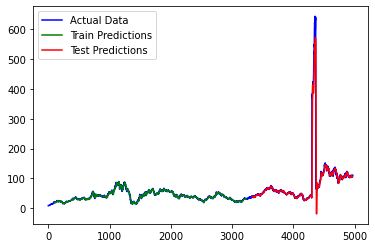

In [28]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), color='blue', label='Actual Data')
plt.plot(trainPredictPlot, color='green', label='Train Predictions')
plt.plot(testPredictPlot, color='red', label='Test Predictions')
plt.legend()
plt.show()


In [29]:
len(test_data)


1740

In [30]:
x_input=test_data[1640:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
# demonstrate prediction for next 90 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.15625383]
101
1 day input [0.17287314 0.1765734  0.17578611 0.17484136 0.17972256 0.1814546
 0.18050985 0.179014   0.17649467 0.17743942 0.17688832 0.17389661
 0.17539246 0.17909273 0.17578611 0.17641594 0.17184966 0.16240218
 0.16240218 0.16208726 0.15822954 0.15815081 0.1589381  0.16059141
 0.1632682  0.16366184 0.1638193  0.16507897 0.16192981 0.16334693
 0.15972539 0.15397818 0.15059283 0.15303343 0.15169504 0.1553953
 0.15326962 0.15460801 0.15728479 0.15712734 0.15508038 0.15445055
 0.15799336 0.15232487 0.1553953  0.15145885 0.15185249 0.15193122
 0.15208868 0.14767986 0.14799477 0.14830969 0.15004173 0.15145885
 0.15082902 0.15200995 0.15122266 0.15216741 0.15626132 0.15634005
 0.15618259 0.15563149 0.15634005 0.15712734 0.15696988 0.15405691
 0.15460801 0.15547403 0.15515911 0.15641878 0.15689115 0.16059141
 0.15964666 0.16177235 0.15799336 0.15941048 0.15941048 0.1589381
 0.1578359  0.15500165 0.1564975  0.15602513 0.15382072 0.15256105
 0.15169504 0.15224614 0.15319089 0.

8 day output [[0.15915301]]
9 day input [0.17649467 0.17743942 0.17688832 0.17389661 0.17539246 0.17909273
 0.17578611 0.17641594 0.17184966 0.16240218 0.16240218 0.16208726
 0.15822954 0.15815081 0.1589381  0.16059141 0.1632682  0.16366184
 0.1638193  0.16507897 0.16192981 0.16334693 0.15972539 0.15397818
 0.15059283 0.15303343 0.15169504 0.1553953  0.15326962 0.15460801
 0.15728479 0.15712734 0.15508038 0.15445055 0.15799336 0.15232487
 0.1553953  0.15145885 0.15185249 0.15193122 0.15208868 0.14767986
 0.14799477 0.14830969 0.15004173 0.15145885 0.15082902 0.15200995
 0.15122266 0.15216741 0.15626132 0.15634005 0.15618259 0.15563149
 0.15634005 0.15712734 0.15696988 0.15405691 0.15460801 0.15547403
 0.15515911 0.15641878 0.15689115 0.16059141 0.15964666 0.16177235
 0.15799336 0.15941048 0.15941048 0.1589381  0.1578359  0.15500165
 0.1564975  0.15602513 0.15382072 0.15256105 0.15169504 0.15224614
 0.15319089 0.15256105 0.15200995 0.15445055 0.15767844 0.15547403
 0.1535058  0.15374199

16 day output [[0.15782338]]
17 day input [0.17184966 0.16240218 0.16240218 0.16208726 0.15822954 0.15815081
 0.1589381  0.16059141 0.1632682  0.16366184 0.1638193  0.16507897
 0.16192981 0.16334693 0.15972539 0.15397818 0.15059283 0.15303343
 0.15169504 0.1553953  0.15326962 0.15460801 0.15728479 0.15712734
 0.15508038 0.15445055 0.15799336 0.15232487 0.1553953  0.15145885
 0.15185249 0.15193122 0.15208868 0.14767986 0.14799477 0.14830969
 0.15004173 0.15145885 0.15082902 0.15200995 0.15122266 0.15216741
 0.15626132 0.15634005 0.15618259 0.15563149 0.15634005 0.15712734
 0.15696988 0.15405691 0.15460801 0.15547403 0.15515911 0.15641878
 0.15689115 0.16059141 0.15964666 0.16177235 0.15799336 0.15941048
 0.15941048 0.1589381  0.1578359  0.15500165 0.1564975  0.15602513
 0.15382072 0.15256105 0.15169504 0.15224614 0.15319089 0.15256105
 0.15200995 0.15445055 0.15767844 0.15547403 0.1535058  0.15374199
 0.15696988 0.15917429 0.15854446 0.16248091 0.16192981 0.15625383
 0.15732993 0.158160

24 day output [[0.15605986]]
25 day input [0.1632682  0.16366184 0.1638193  0.16507897 0.16192981 0.16334693
 0.15972539 0.15397818 0.15059283 0.15303343 0.15169504 0.1553953
 0.15326962 0.15460801 0.15728479 0.15712734 0.15508038 0.15445055
 0.15799336 0.15232487 0.1553953  0.15145885 0.15185249 0.15193122
 0.15208868 0.14767986 0.14799477 0.14830969 0.15004173 0.15145885
 0.15082902 0.15200995 0.15122266 0.15216741 0.15626132 0.15634005
 0.15618259 0.15563149 0.15634005 0.15712734 0.15696988 0.15405691
 0.15460801 0.15547403 0.15515911 0.15641878 0.15689115 0.16059141
 0.15964666 0.16177235 0.15799336 0.15941048 0.15941048 0.1589381
 0.1578359  0.15500165 0.1564975  0.15602513 0.15382072 0.15256105
 0.15169504 0.15224614 0.15319089 0.15256105 0.15200995 0.15445055
 0.15767844 0.15547403 0.1535058  0.15374199 0.15696988 0.15917429
 0.15854446 0.16248091 0.16192981 0.15625383 0.15732993 0.15816033
 0.15872811 0.15906824 0.15923396 0.15927732 0.15924032 0.15915301
 0.15903465 0.15889618

32 day output [[0.15433998]]
33 day input [0.15059283 0.15303343 0.15169504 0.1553953  0.15326962 0.15460801
 0.15728479 0.15712734 0.15508038 0.15445055 0.15799336 0.15232487
 0.1553953  0.15145885 0.15185249 0.15193122 0.15208868 0.14767986
 0.14799477 0.14830969 0.15004173 0.15145885 0.15082902 0.15200995
 0.15122266 0.15216741 0.15626132 0.15634005 0.15618259 0.15563149
 0.15634005 0.15712734 0.15696988 0.15405691 0.15460801 0.15547403
 0.15515911 0.15641878 0.15689115 0.16059141 0.15964666 0.16177235
 0.15799336 0.15941048 0.15941048 0.1589381  0.1578359  0.15500165
 0.1564975  0.15602513 0.15382072 0.15256105 0.15169504 0.15224614
 0.15319089 0.15256105 0.15200995 0.15445055 0.15767844 0.15547403
 0.1535058  0.15374199 0.15696988 0.15917429 0.15854446 0.16248091
 0.16192981 0.15625383 0.15732993 0.15816033 0.15872811 0.15906824
 0.15923396 0.15927732 0.15924032 0.15915301 0.15903465 0.15889618
 0.15874344 0.15857892 0.15840398 0.1582192  0.15802535 0.15782338
 0.15761437 0.157399

40 day output [[0.15277936]]
41 day input [0.15508038 0.15445055 0.15799336 0.15232487 0.1553953  0.15145885
 0.15185249 0.15193122 0.15208868 0.14767986 0.14799477 0.14830969
 0.15004173 0.15145885 0.15082902 0.15200995 0.15122266 0.15216741
 0.15626132 0.15634005 0.15618259 0.15563149 0.15634005 0.15712734
 0.15696988 0.15405691 0.15460801 0.15547403 0.15515911 0.15641878
 0.15689115 0.16059141 0.15964666 0.16177235 0.15799336 0.15941048
 0.15941048 0.1589381  0.1578359  0.15500165 0.1564975  0.15602513
 0.15382072 0.15256105 0.15169504 0.15224614 0.15319089 0.15256105
 0.15200995 0.15445055 0.15767844 0.15547403 0.1535058  0.15374199
 0.15696988 0.15917429 0.15854446 0.16248091 0.16192981 0.15625383
 0.15732993 0.15816033 0.15872811 0.15906824 0.15923396 0.15927732
 0.15924032 0.15915301 0.15903465 0.15889618 0.15874344 0.15857892
 0.15840398 0.1582192  0.15802535 0.15782338 0.15761437 0.15739968
 0.15718061 0.15695839 0.15673426 0.15650921 0.15628418 0.15605986
 0.15583688 0.155615

48 day output [[0.15132323]]
49 day input [0.15208868 0.14767986 0.14799477 0.14830969 0.15004173 0.15145885
 0.15082902 0.15200995 0.15122266 0.15216741 0.15626132 0.15634005
 0.15618259 0.15563149 0.15634005 0.15712734 0.15696988 0.15405691
 0.15460801 0.15547403 0.15515911 0.15641878 0.15689115 0.16059141
 0.15964666 0.16177235 0.15799336 0.15941048 0.15941048 0.1589381
 0.1578359  0.15500165 0.1564975  0.15602513 0.15382072 0.15256105
 0.15169504 0.15224614 0.15319089 0.15256105 0.15200995 0.15445055
 0.15767844 0.15547403 0.1535058  0.15374199 0.15696988 0.15917429
 0.15854446 0.16248091 0.16192981 0.15625383 0.15732993 0.15816033
 0.15872811 0.15906824 0.15923396 0.15927732 0.15924032 0.15915301
 0.15903465 0.15889618 0.15874344 0.15857892 0.15840398 0.1582192
 0.15802535 0.15782338 0.15761437 0.15739968 0.15718061 0.15695839
 0.15673426 0.15650921 0.15628418 0.15605986 0.15583688 0.1556157
 0.15539666 0.15518004 0.15496597 0.15475458 0.15454596 0.15433998
 0.15413672 0.15393606 

56 day output [[0.14991261]]
57 day input [0.15122266 0.15216741 0.15626132 0.15634005 0.15618259 0.15563149
 0.15634005 0.15712734 0.15696988 0.15405691 0.15460801 0.15547403
 0.15515911 0.15641878 0.15689115 0.16059141 0.15964666 0.16177235
 0.15799336 0.15941048 0.15941048 0.1589381  0.1578359  0.15500165
 0.1564975  0.15602513 0.15382072 0.15256105 0.15169504 0.15224614
 0.15319089 0.15256105 0.15200995 0.15445055 0.15767844 0.15547403
 0.1535058  0.15374199 0.15696988 0.15917429 0.15854446 0.16248091
 0.16192981 0.15625383 0.15732993 0.15816033 0.15872811 0.15906824
 0.15923396 0.15927732 0.15924032 0.15915301 0.15903465 0.15889618
 0.15874344 0.15857892 0.15840398 0.1582192  0.15802535 0.15782338
 0.15761437 0.15739968 0.15718061 0.15695839 0.15673426 0.15650921
 0.15628418 0.15605986 0.15583688 0.1556157  0.15539666 0.15518004
 0.15496597 0.15475458 0.15454596 0.15433998 0.15413672 0.15393606
 0.15373786 0.153542   0.15334837 0.15315688 0.1529672  0.15277936
 0.15259315 0.152408

64 day output [[0.14852212]]
65 day input [0.15696988 0.15405691 0.15460801 0.15547403 0.15515911 0.15641878
 0.15689115 0.16059141 0.15964666 0.16177235 0.15799336 0.15941048
 0.15941048 0.1589381  0.1578359  0.15500165 0.1564975  0.15602513
 0.15382072 0.15256105 0.15169504 0.15224614 0.15319089 0.15256105
 0.15200995 0.15445055 0.15767844 0.15547403 0.1535058  0.15374199
 0.15696988 0.15917429 0.15854446 0.16248091 0.16192981 0.15625383
 0.15732993 0.15816033 0.15872811 0.15906824 0.15923396 0.15927732
 0.15924032 0.15915301 0.15903465 0.15889618 0.15874344 0.15857892
 0.15840398 0.1582192  0.15802535 0.15782338 0.15761437 0.15739968
 0.15718061 0.15695839 0.15673426 0.15650921 0.15628418 0.15605986
 0.15583688 0.1556157  0.15539666 0.15518004 0.15496597 0.15475458
 0.15454596 0.15433998 0.15413672 0.15393606 0.15373786 0.153542
 0.15334837 0.15315688 0.1529672  0.15277936 0.15259315 0.15240836
 0.15222494 0.15204269 0.1518615  0.15168126 0.15150185 0.15132323
 0.15114523 0.15096787

72 day output [[0.14714777]]
73 day input [0.15964666 0.16177235 0.15799336 0.15941048 0.15941048 0.1589381
 0.1578359  0.15500165 0.1564975  0.15602513 0.15382072 0.15256105
 0.15169504 0.15224614 0.15319089 0.15256105 0.15200995 0.15445055
 0.15767844 0.15547403 0.1535058  0.15374199 0.15696988 0.15917429
 0.15854446 0.16248091 0.16192981 0.15625383 0.15732993 0.15816033
 0.15872811 0.15906824 0.15923396 0.15927732 0.15924032 0.15915301
 0.15903465 0.15889618 0.15874344 0.15857892 0.15840398 0.1582192
 0.15802535 0.15782338 0.15761437 0.15739968 0.15718061 0.15695839
 0.15673426 0.15650921 0.15628418 0.15605986 0.15583688 0.1556157
 0.15539666 0.15518004 0.15496597 0.15475458 0.15454596 0.15433998
 0.15413672 0.15393606 0.15373786 0.153542   0.15334837 0.15315688
 0.1529672  0.15277936 0.15259315 0.15240836 0.15222494 0.15204269
 0.1518615  0.15168126 0.15150185 0.15132323 0.15114523 0.15096787
 0.15079097 0.15061454 0.15043859 0.15026294 0.15008762 0.14991261
 0.14973794 0.14956349 

80 day output [[0.14579217]]
81 day input [0.1564975  0.15602513 0.15382072 0.15256105 0.15169504 0.15224614
 0.15319089 0.15256105 0.15200995 0.15445055 0.15767844 0.15547403
 0.1535058  0.15374199 0.15696988 0.15917429 0.15854446 0.16248091
 0.16192981 0.15625383 0.15732993 0.15816033 0.15872811 0.15906824
 0.15923396 0.15927732 0.15924032 0.15915301 0.15903465 0.15889618
 0.15874344 0.15857892 0.15840398 0.1582192  0.15802535 0.15782338
 0.15761437 0.15739968 0.15718061 0.15695839 0.15673426 0.15650921
 0.15628418 0.15605986 0.15583688 0.1556157  0.15539666 0.15518004
 0.15496597 0.15475458 0.15454596 0.15433998 0.15413672 0.15393606
 0.15373786 0.153542   0.15334837 0.15315688 0.1529672  0.15277936
 0.15259315 0.15240836 0.15222494 0.15204269 0.1518615  0.15168126
 0.15150185 0.15132323 0.15114523 0.15096787 0.15079097 0.15061454
 0.15043859 0.15026294 0.15008762 0.14991261 0.14973794 0.14956349
 0.14938931 0.14921537 0.14904171 0.14886829 0.14869505 0.14852212
 0.14834939 0.148176

88 day output [[0.14445713]]
89 day input [0.15200995 0.15445055 0.15767844 0.15547403 0.1535058  0.15374199
 0.15696988 0.15917429 0.15854446 0.16248091 0.16192981 0.15625383
 0.15732993 0.15816033 0.15872811 0.15906824 0.15923396 0.15927732
 0.15924032 0.15915301 0.15903465 0.15889618 0.15874344 0.15857892
 0.15840398 0.1582192  0.15802535 0.15782338 0.15761437 0.15739968
 0.15718061 0.15695839 0.15673426 0.15650921 0.15628418 0.15605986
 0.15583688 0.1556157  0.15539666 0.15518004 0.15496597 0.15475458
 0.15454596 0.15433998 0.15413672 0.15393606 0.15373786 0.153542
 0.15334837 0.15315688 0.1529672  0.15277936 0.15259315 0.15240836
 0.15222494 0.15204269 0.1518615  0.15168126 0.15150185 0.15132323
 0.15114523 0.15096787 0.15079097 0.15061454 0.15043859 0.15026294
 0.15008762 0.14991261 0.14973794 0.14956349 0.14938931 0.14921537
 0.14904171 0.14886829 0.14869505 0.14852212 0.14834939 0.14817692
 0.14800473 0.14783278 0.14766109 0.1474897  0.14731862 0.14714777
 0.14697726 0.146807  

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,191)

In [34]:
import matplotlib.pyplot as plt


In [35]:
len(df1)


4970

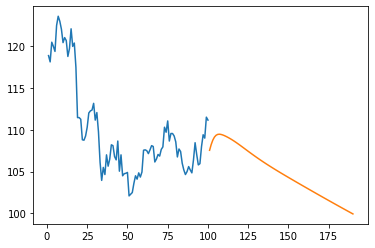

In [36]:
plt.plot(day_new,scaler.inverse_transform(df1[4870:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

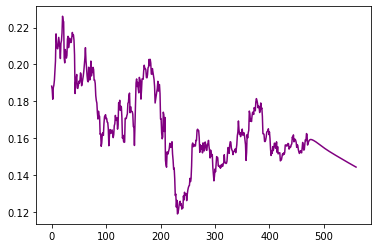

In [37]:
df3 = df1.tolist()
df3.extend(lst_output)

plt.plot(df3[4500:], color='purple')
plt.show()


In [38]:
df3=scaler.inverse_transform(df3).tolist()


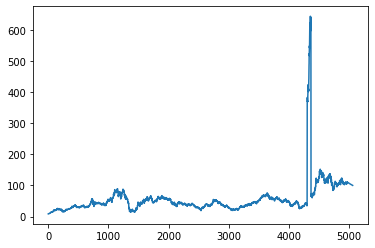

In [39]:
plt.plot(df3)
